## Import Both input and response file
Change the import and export file variable 

In [51]:
import pandas as pd

inputfile = 'example_explanatory_variables.csv'
outputfile = 'example_response_variable.csv'
pd.set_option('display.max_rows', None)
df_input = pd.read_csv(inputfile)
df_output = pd.read_csv(outputfile)
X = df_input
y= df_output['V1']
#print(X)
#encapsulated OVA subset

In [52]:
#print(max(df_output['V1']))
#print(df_input.head(5))
a = df_output['V1'].copy()
dupes = [x for n, x in enumerate(a) if x in a[:n]]
#print(dupes)
a = a.reset_index(drop=True)
con0 = [i for i in range(len(a)) if a[i] == 385]
#print(con0)
X.iloc[48] == X.iloc[1]

duplicate = df_input[df_input.duplicated()]
print(duplicate)


Empty DataFrame
Columns: [Size, Lipid, Orientation, Backbone, PeptideDensity, OligoDensity, Attachment, OligoConc]
Index: []


## Replace elements


In [53]:
Test = False

if(Test):
    X['Orientation'] = X.Orientation.astype(str)
    Ori = pd.get_dummies(X.Orientation)
    X = X.join(Ori)
    X.dtypes 
    X = X.drop('Orientation' ,axis = 1)

    Bk = pd.get_dummies(X.Backbone)
    X = X.join(Bk)
    X = X.drop('Backbone', axis = 1 )

    OD = pd.get_dummies(X.OligoDensity)
    X = X.join(OD, how='right')
    X = X.drop('OligoDensity', axis = 1)

    AT = pd.get_dummies(X.Attachment)
    X = X.join(AT)
    X = X.drop('Attachment', axis = 1)

#X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
#X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

    X['Size'] = X.Size.astype(str)
    Si = pd.get_dummies(X.Size)
    X = X.join(Si)
    X = X.drop('Size' ,axis = 1)

    X['Lipid'] = X.Lipid.astype(str)
    Li = pd.get_dummies(X.Lipid)
    X = X.join(Li) 
    X = X.drop('Lipid' ,axis = 1)

#X['OligoConc'] = X.OligoConc.astype(str)
#OC = pd.get_dummies(X.OligoConc)
#X = X.join(OC) 
#X = X.drop('OligoConc' ,axis = 1)

    X['PeptideDensity'] = X.PeptideDensity.astype(str)
    PD = pd.get_dummies(X.PeptideDensity)
    X = X.join(PD) 
    X = X.drop('PeptideDensity' ,axis = 1)


    
Features = ['Orientation','Backbone','OligoDensity','Attachment','Size','Lipid','PeptideDensity']#,'OligoConc'
for name in Features:
    X[name] = X[name].astype(str)
    tem = pd.get_dummies(X[name])
    X = X.join(tem, how='right')
    X = X.drop(name, axis = 1)
        
#X = X[['1','10','100','1000','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','PeptideDensity','100%','80%','Size']]
#X = X[['High' ,'Low', 'VHigh','Chol','DOPE','OligoConc','PO','PS','0.0','0.05','0.5','80%','100%','50','80','3','5']]
X = X[['OligoConc','Chol','DOPE','PO','PS','3','5','High' ,'Low','VHigh','80%','100%','0.0','0.05','0.5','50','80']]
#'1','10','100','1000',,'0.0','0.05','0.5','80%','100%','50','80','OligoConc'
print(X.shape)

(672, 17)


In [54]:
from sklearn.utils import shuffle 
X, y = shuffle(X, y, random_state=0)
X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [56]:
print(regr.coef_)

[  0.45993136  72.36682682 -72.36682682 -26.52593735  26.52593735
 -25.52337485  25.52337485   1.48264132   8.7866066  -10.26924792
  -0.95587865   0.95587865   3.91997336   2.85535461  -6.77532798
  -2.15687961   2.15687961]


In [7]:
Pred = regr.predict(X)

0.5947729305542111
(672,)

MAE is  144.31326425954285


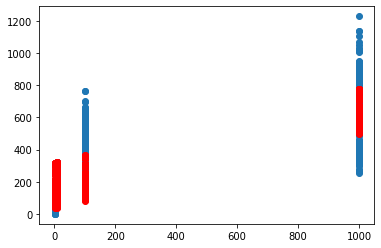

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statistics
import numpy as np
plt.scatter(X['OligoConc'],y)
plt.scatter(X['OligoConc'],Pred,c = "red")
print(r2_score(y,Pred))
print(np.shape(Pred))
print('\nMAE is ',mean_absolute_error(y ,Pred))

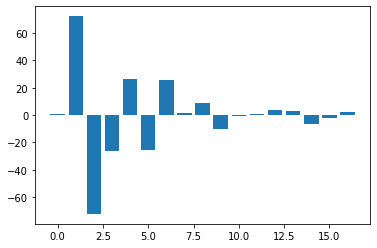

[  0.45993136  72.36682682 -72.36682682 -26.52593735  26.52593735
 -25.52337485  25.52337485   1.48264132   8.7866066  -10.26924792
  -0.95587865   0.95587865   3.91997336   2.85535461  -6.77532798
  -2.15687961   2.15687961]


In [9]:
importance = regr.coef_
X_import = [x for x in range(len(importance))]
plt.bar(X_import, importance.reshape(-1,))
plt.show()
print(importance.reshape(-1,))

K-fold cross-validation to get Q2 value (k-folds = 5)

In [10]:
import warnings
import math
import numpy
def getQ2(test_pred, test_res, rand_res): 

# this function calculates Q2 values

  # set up squared total error and squared residual error
    SS_tot = 0
    SS_res = 0
  
    # continuous variable
      # accumulate errors
    SS_tot = SS_tot + sum(numpy.square(numpy.subtract(test_res,rand_res)))
    SS_res = SS_res + sum(numpy.square(numpy.subtract(test_res,test_pred)))
    
  # do final Q2 calculation
    Q2 = 1 - SS_res / SS_tot
    #Q2 = 1 - (Sum(real-predict)/Sum(real-predict_group_mean))
  # something went wrong and there was NA (rare)
    if math.isnan(Q2) or pd.isna(Q2):
        Q2 = 0
        warn("Q2 in Q2.R created nan")
    return(Q2)

[0.5729827016461797, 0.5991314475530469, 0.5715151810164729, 0.5525827592730259, 0.6176460201460281]
[0.49465826129440715, 0.5030267948832817, 0.48015766310472685, 0.4263335032504999, 0.5626897506520314, 0.5479770177506341, 0.569497902703157, 0.561880090477723, 0.5498259860404924, 0.6033136572885315, 0.5724503717868552, 0.5796556829981974, 0.5548638287526128, 0.5590362274645234, 0.6052287181480716, 0.577012031236514, 0.5924473590390396, 0.5675363292028927, 0.5626507970607542, 0.6152314292807581, 0.571936993049148, 0.5896322856490488, 0.5685750571857777, 0.5566741927455426, 0.6140051829221418, 0.5690345444466818, 0.589478815512607, 0.5672153187623914, 0.5530987152470148, 0.6139525074310299, 0.5674502473126526, 0.5896262879098457, 0.5667196635084145, 0.5442902501354009, 0.6138253213792486, 0.5680192934406951, 0.5901774309230723, 0.5672204932627112, 0.5425386166923656, 0.6131471295657427]
[0.5012740662759725, 0.5731878501198835, 0.5808042858579251, 0.5894022419353626, 0.5866423937721954, 

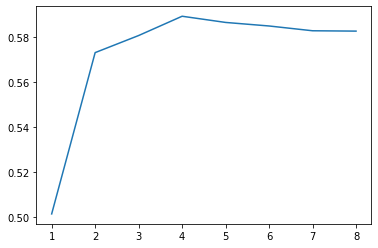

In [11]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score
import statistics as statss
kf = KFold(n_splits=5) #, shuffle = True
kf.get_n_splits(X)
regrt = linear_model.LinearRegression()
Q2=[]
r2 = []
z=0

#X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

for p in range(8):
    z=z+1
    CVX = X.iloc[:, 0:z].copy()
    if CVX.columns[len(CVX.columns)-1] == '3' or CVX.columns[len(CVX.columns)-1] == 'PO' or CVX.columns[len(CVX.columns)-1] == 'Chol'or CVX.columns[len(CVX.columns)-1] == '100%':
        z=z+1
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == 'High':
        z=z+2 
        CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == '1':
        z=z+3
        CVX = X.iloc[:, 0:z].copy()
    #X_test_tem = X_test.iloc[:, 0:z].copy()
    #y_test_tem = y_test

#CVX = Xt.copy()
    CVy = y.copy()
    Q2infold = []
    for train_index, test_index in kf.split(X):
        Test_pred = [] #predicted values
        Test_res = []  #original values
        rand_res = []  #training set mean values
        
        #print("TRAIN:", train_index, "TEST:", test_index)
        trainX , trainY = CVX.iloc[train_index] , CVy.iloc[train_index]
        testX , testY =  CVX.iloc[test_index] , CVy.iloc[test_index]
        #print(trainY)
        regrt.fit(trainX, trainY)
        Pred_test = regrt.predict(testX)#testX#X_test_tem
        Mean_trained_y=statss.mean(trainY)
        for x in range(len(Pred_test)):
            rand_res.append(Mean_trained_y)
        Test_pred.extend(Pred_test)
        Test_res.extend(testY)#testY#y_test_tem
        
    #print(trainX.head(2))
        Q2infold.append(getQ2(Test_pred,Test_res,rand_res))
        r2.append(r2_score(testY,Pred_test))
    Q2.append(np.mean(Q2infold))
print(Q2infold)
print(r2)
plt.plot([1,2,3,4,5,6,7,8],Q2)
print(Q2)
plt.show()


C:\Users\kenll\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


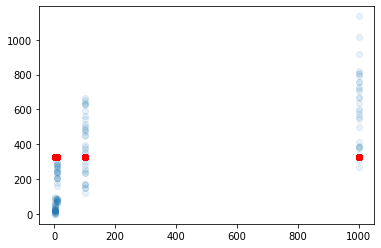

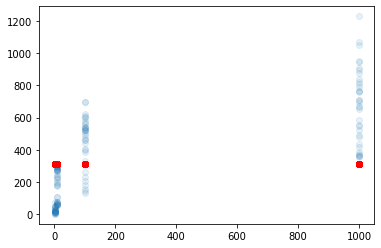

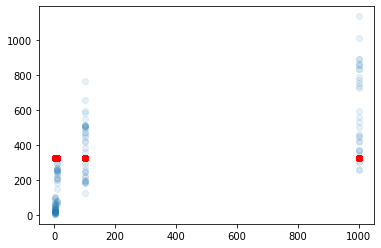

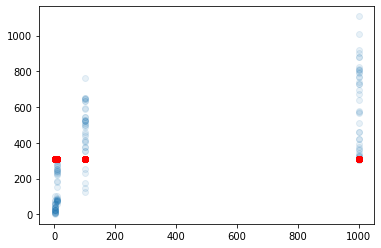

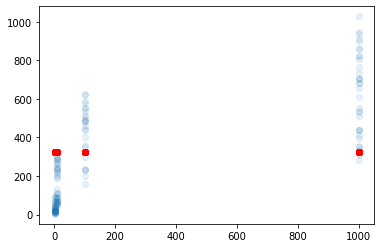

1.0


In [12]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, logit
from sklearn.preprocessing import normalize
#clf = LogisticRegression(random_state=10)
log_y = y.copy()
norm_y = numpy.divide(numpy.subtract(log_y, log_y.min()) , numpy.subtract(log_y.max(), log_y.min()))
norm_y = log_y
#mean_y = statss.mean(log_y)
#a = numpy.array(log_y.values.tolist())
#log_y = numpy.where(a >= mean_y, 1, 0).tolist()
#log_X = X[['OligoConc','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','0.0','0.05','0.5','100%','80%']]#Size
#log_X = X[['100%','80%','3','5','High' ,'Low', 'VHigh','PeptideDensity','PO','PS','Chol','DOPE','1','10','100','1000']]
#clf.fit(log_X, log_y)
#log_pred = clf.predict(log_X.head(100))
#print(expit([[1, 0.5, 1], [1, 0, 1], [1, 0, 1]]))
def sigmoid(x, a, b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,c):
    #print(x)
    y = numpy.divide(c , (1 + expit(-(b1*x[:,0]+b2*x[:,1]+b3*x[:,2]+b4*x[:,3]+b5*x[:,4]+b6*x[:,5]+b7*x[:,6]+b8*x[:,7]+b9*x[:,8]+b10*x[:,9]+b11*x[:,10]+b12*x[:,11]+b13*x[:,12]+b14*x[:,13]+b15*x[:,14]+b16*x[:,15]-a))))
    return y

from scipy.optimize import curve_fit

log_X=X.copy()
rand_resL = []
Test_predL = []
Test_resL = []
for train_index, test_index in kf.split(log_X):
    
    trainX , trainY = log_X.iloc[train_index] , norm_y.iloc[train_index]
    testX , testY =  log_X.iloc[test_index] , norm_y.iloc[test_index]

    Xdata = np.flip(trainX.to_numpy())
    #print(x[:,0])
    p0 = np.repeat(1,18)
    fitParams, fitCovariances = curve_fit(sigmoid, Xdata, np.array(trainY), p0)


    plt.scatter(testX['OligoConc'],testY,alpha = 0.1)
    #print(testX)
    testXnp = np.flip(testX.to_numpy())
    #print(fitParams[0])
    outsig = sigmoid(testXnp,fitParams[0],fitParams[1],fitParams[2],fitParams[3],fitParams[4],fitParams[5],fitParams[6],fitParams[7],fitParams[8],fitParams[9],fitParams[10],fitParams[11],fitParams[12],fitParams[13],fitParams[14],fitParams[15],fitParams[16],fitParams[17])
    #print(outsig)
    plt.scatter(testX['OligoConc'],outsig,c = "red")

    plt.show()
    Mean_trained_y = statss.mean(trainY.values.ravel())
    #print(Mean_trained_y)
    for x in range(len(outsig)):
        rand_resL.append(Mean_trained_y)
    Test_predL.extend(outsig.ravel())
    Test_resL.extend(testY.values.ravel())
print(getQ2(rand_resL,Test_predL,Test_resL))

    
#print(log_X)
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(clf, log_X, log_y, values_format = 'd' , display_labels =['Did not leave', "left"])

[42, 52, 110]
0.08895315682281059
[]
False
[]
[0.47474113746317614, 0.5763702231411878, 0.5623165490197763, 0.5670026459611592, 0.5638146232118253, 0.55989621639866, 0.5587213671490159, 0.558876291710129]


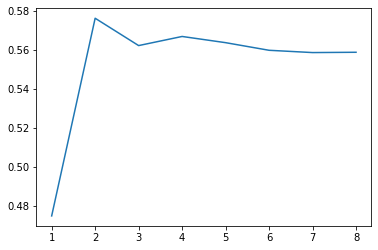

In [13]:
if(True):
    norm_y = numpy.divide(numpy.subtract(log_y, log_y.min()) , numpy.subtract(log_y.max(), log_y.min()))
    norm_y = norm_y.reset_index(drop = True)
    #print(norm_y.index)
    con0 = [i for i in range(len(norm_y)) if norm_y[i] == 0]
    con1 = [i for i in range(len(norm_y)) if norm_y[i] == 1]
    print(con0)
    norm_y = norm_y[norm_y > 0]
    norm_y = norm_y[norm_y < 1]
    nnorm_y = norm_y.reset_index(drop = True)
    print(nnorm_y[165])
    print([i for i in range(len(nnorm_y)) if nnorm_y[i] <0.00001])
    print(True in np.isinf(nnorm_y.to_numpy()))
    logis_y = -numpy.log(numpy.divide(numpy.subtract(1,nnorm_y.to_numpy()),nnorm_y.to_numpy()))
    #print(-numpy.log(numpy.divide(numpy.subtract(1,nnorm_y.to_numpy()),nnorm_y.to_numpy())))
    print([i for i in range(len(logis_y)) if np.isinf(logis_y[i])])
    Q2logf = []
    zL=0
    regrt = linear_model.LinearRegression()
    for p in range(8):
        Q2Log=[]
        zL=zL+1
        CVXL = log_X.iloc[:, 0:zL].copy()
        if CVXL.columns[len(CVXL.columns)-1] == '3' or CVXL.columns[len(CVXL.columns)-1] == 'PO' or CVXL.columns[len(CVXL.columns)-1] == 'Chol'or CVXL.columns[len(CVXL.columns)-1] == '100%':
            zL=zL+1
            CVXL = log_X.iloc[:, 0:zL].copy()
        elif CVXL.columns[len(CVXL.columns)-1] == 'High':
            zL=zL+2 
            CVXL = log_X.iloc[:, 0:zL].copy()
        elif CVXL.columns[len(CVXL.columns)-1] == '1':
            zL=zL+3
            CVXL = log_X.iloc[:, 0:zL].copy()

        CVXL = CVXL.reset_index(drop = True)
        CVXL.drop(con0, inplace = True)
        CVXL.drop(con1, inplace = True)
        #print(CVXL)
        CVyL = pd.DataFrame(logis_y).copy()
        
        
        for train_index, test_index in kf.split(CVXL):
            Test_predL = [] #predicted values
            Test_resL = []  #original values
            rand_resL = []  #training set mean values
            trainX , trainY = CVXL.iloc[train_index] , CVyL.iloc[train_index]
            testX , testY =  CVXL.iloc[test_index] , CVyL.iloc[test_index]
            regrt.fit(trainX, trainY)
            Pred_test = regrt.predict(testX)#testX
            from scipy.special import expit
            #trainY_log = expit(trainY)
            Mean_trained_y = statss.mean(trainY.values.ravel())
            for x in range(len(Pred_test)):
                rand_resL.append(Mean_trained_y)
            Test_predL.extend(Pred_test.ravel())
            Test_resL.extend(testY.values.ravel())
            
            
            rand_resL = expit(rand_resL)
            Test_predL = expit(Test_predL)
            Test_resL = expit(Test_resL)
            #print(Test_predL)
            Q2Log.append(getQ2(Test_predL,Test_resL,rand_resL))
        Q2logf.append(np.mean(Q2Log))
    print(Q2logf)
plt.plot([1,2,3,4,5,6,7,8],Q2logf)#Q2logf
plt.show()


In [34]:
from sklearn.metrics import r2_score
print(r2_score(Test_resL,Test_predL))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Test_resL,Test_predL)

0.5811348092664068


0.11459530107573242

         V1
6    396.20
7    666.87
9    590.01
12   494.10
16   375.49
20   148.08
23   323.69
24   645.36
27   248.50
28   484.63
29   164.36
30   357.26
37   281.79
38   259.64
39   300.31
45   470.92
55   630.94
60   119.07
61   450.90
65   236.20
66   544.31
67   653.41
71   518.37
84   480.24
87   351.72
96   328.81
97   627.88
104  565.02
109  170.11
114  631.74
119  170.00
123  503.87
124  447.49
126  233.91
129  382.03
132  150.72
142  229.31
146  563.79
147  624.19
150  536.63
151  544.47
155  504.41
156  605.87
159  205.20
162  458.88
170  312.61
175  575.77
176  697.99
180  389.99
186  155.46
191  607.84
192  518.65
196  698.27
199  557.35
202  534.01
207  521.65
212  398.25
217  489.76
219  462.24
223  131.77
228  597.12
230  262.59
235  333.34
243  521.20
245  405.89
247  522.90
248  476.22
251  440.09
252  184.33
253  145.74
254  303.63
266  541.55
272  508.06
273  509.83
274  765.28
276  493.83
284  415.29
285  256.61
286  127.36
288  183.24
291  357.42
293  509.56
298 

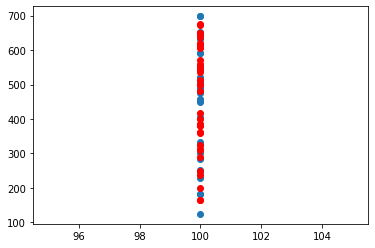


MAE is  43.81613383573644
458.6996 154.54913
(34,)


In [57]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle 



xgbc = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)#tree_method="gpu_hist"#enable_categorical=True, eval_metric = mean_absolute_error

df_input, df_output = shuffle(df_input, df_output, random_state=0)
df_input = df_input.reset_index(drop = True)
df_output = df_output.reset_index(drop = True)

df_inBoost =  df_input.copy()
df_inBoost['Orientation'] = df_inBoost['Orientation'].astype("category")
df_inBoost['Backbone'] = df_inBoost['Backbone'].astype("category")
df_inBoost['OligoDensity'] = df_inBoost['OligoDensity'].astype("category")
df_inBoost['Attachment'] = df_inBoost['Attachment'].astype("category")
df_inBoost['Lipid'] = df_inBoost['Lipid'].astype("category")
df_inBoost['Size'] = df_inBoost['Size'].astype("category")
df_inBoost['PeptideDensity'] = df_inBoost['PeptideDensity'].astype("category")

df_inBoost = df_inBoost[df_inBoost['OligoConc'] == 100]

#df_inBoost['OligoConc'] = df_inBoost['OligoConc'].astype("category")
df_output = df_output.iloc[df_inBoost.index] 
print(df_output)
df_inBoost, df_inBoost_test, df_outputB, df_outputB_test = train_test_split(df_inBoost, df_output, test_size=0.2)

print(df_inBoost.dtypes)
print(df_inBoost.shape)
print(df_outputB.shape)
xgbc.fit(df_inBoost,df_outputB)
Pred_XGB = xgbc.predict(df_inBoost_test)
plt.scatter(df_inBoost_test['OligoConc'],df_outputB_test)
#print(Pred_XGB)
plt.scatter(df_inBoost_test['OligoConc'],Pred_XGB,c = "red")
plt.show()
print('\nMAE is ',mean_absolute_error(df_outputB_test ,Pred_XGB))

print(statss.mean(Pred_XGB),np.std(Pred_XGB))

print(np.shape(Pred_XGB))

In [60]:
#df_inBoost

,Size,Lipid,Orientation,Backbone,PeptideDensity,OligoDensity,Attachment,OligoConc
119,80,100%,3,PO,0.50,High,DOPE,100
87,50,80%,3,PO,0.05,Low,Chol,100
109,80,100%,5,PO,0.50,Low,DOPE,100
202,80,100%,3,PS,0.00,High,Chol,100
443,50,80%,5,PO,0.05,High,Chol,100
156,80,80%,5,PS,0.50,High,Chol,100
191,50,100%,3,PS,0.05,Low,Chol,100
343,50,80%,5,PS,0.05,High,Chol,100
521,50,100%,3,PS,0.00,High,DOPE,100
374,80,100%,3,PO,0.00,VHigh,DOPE,100


Q2 function for XGBoost

In [58]:
from sklearn.metrics import mean_absolute_error
Q2Boost=[]
zB=0
xgbt = xgb.XGBRegressor(tree_method="hist",enable_categorical=True)#tree_method="hist",,enable_categorical=True, 
zB=8
    #zB=zB+1
    #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #if CVXB.columns[len(CVXB.columns)-1] == '3' or CVXB.columns[len(CVXB.columns)-1] == 'PO' or CVXB.columns[len(CVXB.columns)-1] == 'Chol'or CVXB.columns[len(CVXB.columns)-1] == '100%':
        #zB=zB+1
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == 'High':
        #zB=zB+2 
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()
    #elif CVXB.columns[len(CVXB.columns)-1] == '1':
        #zB=zB+3
        #CVXB = df_inBoost.iloc[:, 0:zB].copy()

    #print(CVXL.head(2))
CVXB = df_inBoost.copy()
CVyB = df_outputB.copy()

kf = KFold(n_splits=5,shuffle = True) #, shuffle = True
kf.get_n_splits(CVXB)
u=0
Q2infold = []
for train_index, test_index in kf.split(CVXB):
    Test_predB = [] #predicted values
    Test_resB = []  #original values
    rand_resB = []  #training set mean values
    
    print(u)
    u=u+1
    trainX , trainY = CVXB.iloc[train_index] , CVyB.iloc[train_index]
    testX , testY =  CVXB.iloc[test_index] , CVyB.iloc[test_index]
    xgbt.fit(trainX, trainY)
    Pred_test = xgbt.predict(df_inBoost_test)#testX
    Mean_trained_y=statss.mean(df_outputB_test.values.ravel())#trainY
    for x in range(len(Pred_test)):
        rand_resB.append(Mean_trained_y)
    Test_predB.extend(Pred_test.ravel())
    Test_resB.extend(df_outputB_test.values.ravel())#testY
    Q2infold.append(getQ2(Test_predB,Test_resB,rand_resB))
    print(getQ2(Test_predB,Test_resB,rand_resB))
Q2Boost.append(np.mean(Q2infold))
print(Q2infold)
#Q2Boost.append(getQ2(Test_predB,Test_resB,rand_resB))
print(Q2Boost)
#plt.plot([0,8],[Q2Boost,Q2Boost])
#plt.show()

0
0.836243039320503
1
0.8225801292294801
2
0.8268407027335399
3
0.8294756124051538
4
0.8585877453850315
[0.836243039320503, 0.8225801292294801, 0.8268407027335399, 0.8294756124051538, 0.8585877453850315]
[0.8347454458147417]


Feature: 0, Score: 0.01127
Feature: 1, Score: 0.02430
Feature: 2, Score: 0.06018
Feature: 3, Score: 0.36642
Feature: 4, Score: 0.01481
Feature: 5, Score: 0.02978
Feature: 6, Score: 0.49323
Feature: 7, Score: 0.00000


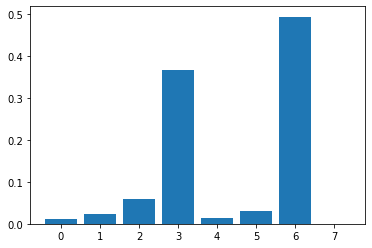

In [59]:
#get importance
importanceXG = xgbt.feature_importances_
#summarize
for i,v in enumerate(importanceXG):
    print('Feature: %0d, Score: %.5f' %(i,v))
#plot feature importance
plt.bar([x for x in range(len(importanceXG))], importanceXG)
plt.show()

## Diminishing points

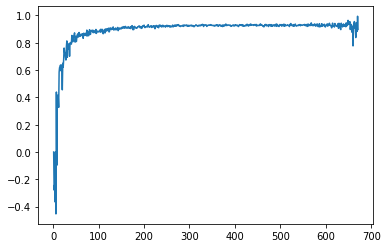

In [18]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

xgbc = xgb.XGBRegressor(tree_method="hist", enable_categorical=True)#tree_method="gpu_hist"#enable_categorical=True, eval_metric = mean_absolute_error


df_inBoost =  df_input.copy()
df_inBoost['Orientation'] = df_inBoost['Orientation'].astype("category")
df_inBoost['Backbone'] = df_inBoost['Backbone'].astype("category")
df_inBoost['OligoDensity'] = df_inBoost['OligoDensity'].astype("category")
df_inBoost['Attachment'] = df_inBoost['Attachment'].astype("category")
df_inBoost['Lipid'] = df_inBoost['Lipid'].astype("category")
df_inBoost['Size'] = df_inBoost['Size'].astype("category")
df_inBoost['PeptideDensity'] = df_inBoost['PeptideDensity'].astype("category")
df_inBoost['OligoConc'] = df_inBoost['OligoConc'].astype("category")
df_inBoost.drop()
#336+336
df_inBoost_org = df_inBoost.copy()
df_output_org = df_output.copy()

Q2f = []
#tsize = np.linspace(0,1,672)
for tsizeidx in range(671 ,0,-1):
    if tsizeidx ==0:
        continue
    Q2infold = []
    #kf = KFold(n_splits=tsizeidx) #, shuffle = True
    #kf.get_n_splits(X)
    #for train_index, test_index in kf.split(df_inBoost):
        #df_inBoost , df_outputB = df_inBoost_org.iloc[train_index] , df_output_org.iloc[train_index]
    for ite in range(5):
        #df_inBoost_test , df_outputB_test =  df_inBoost_org.iloc[test_index] , df_output_org.iloc[test_index]
        df_inBoost, df_inBoost_test, df_outputB, df_outputB_test = train_test_split(df_inBoost_org, df_output_org, test_size=tsizeidx)
        Test_predB = [] #predicted values
        Test_resB = []  #original values
        rand_resB = []  #training set mean values
        xgbc.fit(df_inBoost,df_outputB)
        Pred_XGB = xgbc.predict(df_inBoost_test)
        Mean_trained_y=statss.mean(df_outputB.values.ravel())#trainY
        for x in range(len(Pred_XGB)):
            rand_resB.append(Mean_trained_y)
        Test_predB.extend(Pred_XGB.ravel())
        Test_resB.extend(df_outputB_test.values.ravel())#testY
        Q2infold.append(getQ2(Test_predB,Test_resB,rand_resB))
    #print(getQ2(Test_predB,Test_resB,rand_resB))
    Q2f.append(np.mean(Q2infold))
plt.plot(np.linspace(1,671,671),Q2f)
plt.show()

In [19]:
Score = np.add(Q2f, np.subtract(1,(np.divide(np.linspace(1,671,671),671))))
con = [idx for idx in range(len(Score)) if Score[idx] ==  max(Score)]
print(con)
print('\n',Q2f[con[0]])

[46]

 0.8722106455090067


In [20]:
print(Score)
print('\n',Q2f[25])

[0.99850981 0.71829672 0.75454622 0.62864166 0.99265256 0.5378807
 1.42858571 0.89154012 1.35036948 1.40155501 1.38578458 1.30886356
 1.5654049  1.59770646 1.59933179 1.61249904 1.56933742 1.61032576
 1.59232478 1.42530697 1.6185466  1.58787276 1.64343394 1.72532471
 1.69256524 1.68434312 1.65119447 1.63147715 1.72691402 1.76850076
 1.64734808 1.73616756 1.70599497 1.71281405 1.74147156 1.64715662
 1.74333409 1.74019846 1.74386964 1.73012601 1.79233253 1.78030737
 1.74231724 1.77995431 1.77744582 1.78569627 1.80216594 1.73318834
 1.73355647 1.77322855 1.73280472 1.76044366 1.77869971 1.78360438
 1.75911808 1.7863064  1.79011551 1.75950491 1.75954676 1.77218784
 1.76024688 1.76111444 1.77050506 1.76052968 1.76684091 1.73373294
 1.76962279 1.76644601 1.75049468 1.76244426 1.76260471 1.75840066
 1.74264442 1.78214375 1.73789885 1.76787246 1.74459535 1.73499008
 1.74938053 1.77663832 1.74501968 1.73852584 1.75869687 1.76393967
 1.76038815 1.76365131 1.7518955  1.7426994  1.75765772 1.74050